# Linear Regression

## Part - 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn')

### Simple Linear Regression

#### Simulated Line of Best Fit with actual vs predicted

In [3]:
x_sim = np.array([1, 3, 2, 5, 4, 7, 6, 9, 8])
y_sim = 0.5 * x_sim + 1
yhat_sim = np.array([2.2, 3.0, 1.7, 3.5, 2.4, 5.3, 4.0, 6.1, 4.7])
x_txt = [1.2, 2.2, 2.2, 4.2, 6.2, 8.2, 8.2]
y_txt = [1.95, 1.85, 2.65, 2.65, 4.75, 4.75, 5.75]
label = ['$y_1 - y$', '$y_2 - y$', '$y_3 - y$', '$y_4 - y$', '$y_7 - y$', '$y_8 - y$', '$y_9 - y$']

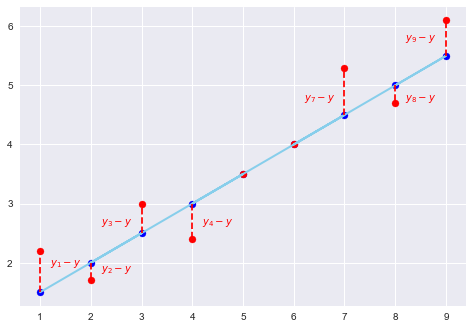

In [4]:
plt.plot(x_sim, y_sim, linewidth=2, color='skyblue')
plt.scatter(x_sim, y_sim, color='blue')
plt.scatter(x_sim, yhat_sim, color='red')
for i in range(0, 9):
    plt.plot([x_sim[i], x_sim[i]], [y_sim[i], yhat_sim[i]], linestyle='--', color='red')
for i in range(0, 7):
    plt.text(x_txt[i], y_txt[i], label[i], color='red')
plt.show()

#### Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#### Check column data types

In [6]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

#### Fix data types for the columns - horsepower and car_name

In [7]:
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')

In [8]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         string
dtype: object

#### Display first few records

In [9]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [10]:
len(auto_df)

397

#### Check for null values in horsepower

In [11]:
auto_df[auto_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
31,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
125,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
329,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
335,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
353,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
373,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


#### Eliminate null values in horseposer

In [12]:
auto_df = auto_df[auto_df.horsepower.notnull()]
len(auto_df)

391

#### Check for null values in mpg

In [13]:
auto_df[auto_df.mpg.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


#### Display statistics about horsepower

In [14]:
auto_df.horsepower.describe()

count    391.000000
mean     104.404092
std       38.518732
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

#### Relationship plot between auto mpg (y) and horsepower (x).
The relationship can be written as: $mpg = \beta_0 + \beta_1.horsepower$

In [15]:
x = auto_df.horsepower
x_sqr = x * x
y = auto_df.mpg
xy = x * y
x_bar = x.mean()
x_sqr_bar = x_sqr.mean()
x_bar_sqr = x_bar * x_bar
y_bar = y.mean()
xy_bar = xy.mean()
denom = x_sqr_bar - x_bar_sqr
beta_0 = (y_bar * x_sqr_bar - x_bar * xy_bar) / denom
beta_1 = (xy_bar - x_bar * y_bar) / denom
y_hat = beta_0 + beta_1 * x

In [16]:
beta_0, beta_1

(39.93294293747181, -0.15778209515828398)

#### Plot the relationship between horsepower and mpg with the **Line of Best Fit**

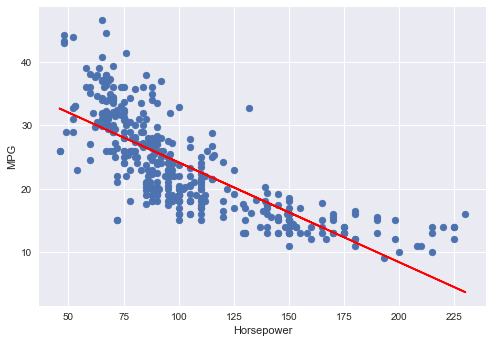

In [17]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

#### R-Squared measure

In [18]:
sse_d = y - y_hat
sst_d = y - y_bar
r2 = 1 - sse_d.dot(sse_d)/sst_d.dot(sst_d)
r2

0.605540338400842